**Installing Dependecies**

In [ ]:
# Install the library
%pip install pythae

**Using gpu if available**

In [ ]:
import torch
import torchvision.datasets as datasets

device = "cuda" if torch.cuda.is_available() else "cpu"

# %load_ext autoreload
# %autoreload 2

**Loading dataset and defining split between train and eval data after random shuffling**

In [ ]:
# # mnist_trainset = datasets.MNIST(root='../../data', train=True, download=True, transform=None)

# # train_dataset = mnist_trainset.data[:-10000].reshape(-1, 1, 28, 28) / 255.
# # eval_dataset = mnist_trainset.data[-10000:].reshape(-1, 1, 28, 28) / 255.

# cifar10_trainset = datasets.CIFAR10(root='../../data', train=True, download=True, transform=None)

# train_dataset = cifar10_trainset.data[:-10000].transpose(0, 3, 1, 2) / 255.
# eval_dataset = cifar10_trainset.data[-10000:].transpose(0, 3, 1, 2) / 255.

In [ ]:
import numpy as np

cifar10_trainset = datasets.CIFAR10(root='../../data', train=True, download=True, transform=None)

data = cifar10_trainset.data
labels = np.array(cifar10_trainset.targets)

perm = np.random.permutation(len(data))

data_shuffled = data[perm]
labels_shuffled = labels[perm]

train_dataset = data_shuffled[:-10000].transpose(0, 3, 1, 2) / 255.
eval_dataset  = data_shuffled[-10000:].transpose(0, 3, 1, 2) / 255.

100%|██████████| 170M/170M [00:03<00:00, 42.9MB/s]


**Showing the class distribution after splitting**

In [ ]:
from torchvision import datasets
import numpy as np
from collections import Counter

perm = np.random.permutation(len(data))
labels_shuffled = labels[perm]

train_labels_shuffled = labels_shuffled[:40000]
eval_labels_shuffled  = labels_shuffled[40000:]

print("\n=== After Manual 40k/10k Split (With Shuffle) ===")
print("Train class distribution:")
for cls, count in sorted(Counter(train_labels_shuffled).items()):
    print(f"  Class {cls}: {count}")
print("Eval class distribution:")
for cls, count in sorted(Counter(eval_labels_shuffled).items()):
    print(f"  Class {cls}: {count}")



=== After Manual 40k/10k Split (With Shuffle) ===
Train class distribution:
  Class 0: 4020
  Class 1: 3970
  Class 2: 4004
  Class 3: 3967
  Class 4: 4020
  Class 5: 4062
  Class 6: 3976
  Class 7: 4030
  Class 8: 3965
  Class 9: 3986
Eval class distribution:
  Class 0: 980
  Class 1: 1030
  Class 2: 996
  Class 3: 1033
  Class 4: 980
  Class 5: 938
  Class 6: 1024
  Class 7: 970
  Class 8: 1035
  Class 9: 1014


In [ ]:
from pythae.models import VAE, VAEConfig
from pythae.trainers import BaseTrainerConfig
from pythae.pipelines.training import TrainingPipeline
from pythae.models.nn.benchmarks.cifar import Encoder_ResNet_VAE_CIFAR, Decoder_ResNet_AE_CIFAR

**Model Configuration**

In [ ]:
config = BaseTrainerConfig(
    output_dir='my_model',
    learning_rate=1e-4,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_epochs=100, # Change this to train the model a bit more
    optimizer_cls="AdamW",
    optimizer_params={"weight_decay": 0.05, "betas": (0.91, 0.99)}
)


model_config = VAEConfig(
    input_dim=(3, 32, 32),
    latent_dim=16
)

model = VAE(
    model_config=model_config,
    encoder=Encoder_ResNet_VAE_CIFAR(model_config),
    decoder=Decoder_ResNet_AE_CIFAR(model_config)
)

In [ ]:
pipeline = TrainingPipeline(
    training_config=config,
    model=model
)

This code block trains the VAE using the train and eval datasets

In [ ]:
pipeline(
    train_data=train_dataset,
    eval_data=eval_dataset
)

Preprocessing train data...
INFO:pythae.pipelines.training:Preprocessing train data...
Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Preprocessing eval data...

INFO:pythae.pipelines.training:Preprocessing eval data...

Checking eval dataset...
INFO:pythae.pipelines.training:Checking eval dataset...
Using Base Trainer

INFO:pythae.pipelines.training:Using Base Trainer

Model passed sanity check !
Ready for training.

INFO:pythae.trainers.base_trainer.base_trainer:Model passed sanity check !
Ready for training.

Created my_model folder since did not exist.

INFO:pythae.trainers.base_trainer.base_trainer:Created my_model folder since did not exist.

Created my_model/VAE_training_2025-11-10_15-09-03. 
Training config, checkpoints and final model will be saved here.

INFO:pythae.trainers.base_trainer.base_trainer:Created my_model/VAE_training_2025-11-10_15-09-03. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_

Training of epoch 1/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 1/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 61.4107
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 61.4107
Eval loss: 50.8955
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 50.8955
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 2/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 49.536
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 49.536
Eval loss: 48.6996
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 48.6996
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 3/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 48.4696
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 48.4696
Eval loss: 48.0364
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 48.0364
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 4/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 4/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.9135
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.9135
Eval loss: 47.7893
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.7893
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 5/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 5/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.5242
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.5242
Eval loss: 47.32
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.32
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 6/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 6/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.3082
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.3082
Eval loss: 47.1798
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.1798
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 7/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 7/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.1067
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.1067
Eval loss: 46.9783
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.9783
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 8/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 8/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.9458
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.9458
Eval loss: 46.8114
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.8114
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 9/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 9/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.8624
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.8624
Eval loss: 46.7511
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.7511
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 10/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 10/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.7413
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.7413
Eval loss: 46.7134
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.7134
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 11/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 11/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.6769
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.6769
Eval loss: 46.555
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.555
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 12/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 12/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.6175
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.6175
Eval loss: 46.5298
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.5298
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 13/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 13/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.5436
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.5436
Eval loss: 46.4185
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.4185
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 14/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 14/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.4906
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.4906
Eval loss: 46.3964
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.3964
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 15/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 15/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.3887
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.3887
Eval loss: 46.3926
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.3926
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 16/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 16/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.361
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.361
Eval loss: 46.2195
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.2195
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 17/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 17/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.316
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.316
Eval loss: 46.1243
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.1243
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 18/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 18/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.3012
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.3012
Eval loss: 46.1722
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.1722
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 19/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 19/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.231
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.231
Eval loss: 46.1171
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.1171
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 20/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 20/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.2254
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.2254
Eval loss: 46.1105
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.1105
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 21/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 21/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.1795
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.1795
Eval loss: 46.0051
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.0051
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 22/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 22/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.1226
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.1226
Eval loss: 46.0387
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.0387
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 23/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 23/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.0678
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.0678
Eval loss: 46.0323
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.0323
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 24/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 24/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.101
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.101
Eval loss: 45.9429
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.9429
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 25/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 25/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.0448
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.0448
Eval loss: 45.9465
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.9465
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 26/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 26/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.0115
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.0115
Eval loss: 45.9513
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.9513
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 27/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 27/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.0016
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.0016
Eval loss: 45.9412
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.9412
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 28/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 28/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.9802
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.9802
Eval loss: 45.9351
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.9351
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 29/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 29/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.9409
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.9409
Eval loss: 45.9253
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.9253
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 30/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 30/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.9173
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.9173
Eval loss: 45.8153
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.8153
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 31/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 31/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.8818
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.8818
Eval loss: 45.7749
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.7749
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 32/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 32/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.8571
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.8571
Eval loss: 45.8202
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.8202
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 33/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 33/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.8682
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.8682
Eval loss: 45.8454
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.8454
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 34/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 34/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.8452
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.8452
Eval loss: 45.8384
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.8384
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 35/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 35/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.8112
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.8112
Eval loss: 45.8824
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.8824
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 36/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 36/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.7979
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.7979
Eval loss: 45.8854
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.8854
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 37/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 37/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.768
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.768
Eval loss: 45.7891
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.7891
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 38/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 38/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.7418
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.7418
Eval loss: 45.7749
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.7749
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 39/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 39/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.7367
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.7367
Eval loss: 45.7145
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.7145
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 40/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 40/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.7389
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.7389
Eval loss: 45.8073
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.8073
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 41/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 41/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.7421
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.7421
Eval loss: 45.763
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.763
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 42/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 42/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.7182
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.7182
Eval loss: 45.6472
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.6472
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 43/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 43/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.7022
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.7022
Eval loss: 45.7875
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.7875
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 44/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 44/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.6696
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.6696
Eval loss: 45.7479
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.7479
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 45/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 45/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.6366
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.6366
Eval loss: 45.7108
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.7108
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 46/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 46/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.6372
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.6372
Eval loss: 45.7422
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.7422
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 47/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 47/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.6579
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.6579
Eval loss: 45.6803
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.6803
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 48/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 48/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.6066
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.6066
Eval loss: 45.6638
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.6638
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 49/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 49/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.597
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.597
Eval loss: 45.5807
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5807
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 50/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 50/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.5744
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.5744
Eval loss: 45.8162
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.8162
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 51/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 51/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.6052
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.6052
Eval loss: 45.6162
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.6162
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 52/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 52/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.577
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.577
Eval loss: 45.5762
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5762
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 53/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 53/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.5448
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.5448
Eval loss: 45.6495
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.6495
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 54/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 54/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.5574
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.5574
Eval loss: 45.6547
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.6547
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 55/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 55/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.5089
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.5089
Eval loss: 45.9076
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.9076
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 56/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 56/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.5139
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.5139
Eval loss: 45.6413
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.6413
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 57/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 57/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.4908
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.4908
Eval loss: 45.5478
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5478
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 58/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 58/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.5113
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.5113
Eval loss: 45.6785
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.6785
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 59/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 59/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.4642
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.4642
Eval loss: 45.5986
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5986
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 60/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 60/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.4596
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.4596
Eval loss: 45.5583
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5583
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 61/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 61/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.4434
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.4434
Eval loss: 45.5814
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5814
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 62/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 62/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.4546
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.4546
Eval loss: 45.5569
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5569
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 63/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 63/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.4189
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.4189
Eval loss: 45.5093
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5093
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 64/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 64/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.4485
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.4485
Eval loss: 45.6469
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.6469
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 65/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 65/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.4458
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.4458
Eval loss: 45.511
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.511
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 66/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 66/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.3935
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.3935
Eval loss: 45.5353
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5353
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 67/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 67/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.401
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.401
Eval loss: 45.6207
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.6207
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 68/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 68/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.3881
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.3881
Eval loss: 45.6038
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.6038
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 69/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 69/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.3636
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.3636
Eval loss: 45.5361
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5361
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 70/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 70/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.3487
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.3487
Eval loss: 45.4992
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4992
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 71/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 71/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.3566
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.3566
Eval loss: 45.4777
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4777
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 72/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 72/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.3392
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.3392
Eval loss: 45.5431
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5431
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 73/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 73/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.349
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.349
Eval loss: 45.5182
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5182
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 74/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 74/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.3208
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.3208
Eval loss: 45.5792
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5792
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 75/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 75/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.3133
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.3133
Eval loss: 45.4577
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4577
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 76/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 76/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.329
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.329
Eval loss: 45.5305
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5305
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 77/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 77/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.3015
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.3015
Eval loss: 45.3997
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.3997
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 78/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 78/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.3119
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.3119
Eval loss: 45.4094
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4094
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 79/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 79/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.2959
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.2959
Eval loss: 45.5482
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5482
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 80/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 80/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.2866
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.2866
Eval loss: 45.4509
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4509
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 81/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 81/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.2924
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.2924
Eval loss: 45.4071
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4071
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 82/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 82/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.2668
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.2668
Eval loss: 45.4403
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4403
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 83/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 83/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.261
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.261
Eval loss: 45.5015
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5015
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 84/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 84/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.243
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.243
Eval loss: 45.4709
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4709
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 85/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 85/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.2583
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.2583
Eval loss: 45.4472
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4472
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 86/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 86/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.2273
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.2273
Eval loss: 45.427
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.427
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 87/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 87/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.2079
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.2079
Eval loss: 45.4875
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4875
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 88/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 88/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.2176
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.2176
Eval loss: 45.4594
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4594
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 89/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 89/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.1998
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.1998
Eval loss: 45.3928
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.3928
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 90/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 90/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.1803
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.1803
Eval loss: 45.4387
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4387
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 91/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 91/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.194
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.194
Eval loss: 45.4455
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4455
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 92/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 92/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.1905
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.1905
Eval loss: 45.4264
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4264
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 93/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 93/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.1978
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.1978
Eval loss: 45.4068
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4068
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 94/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 94/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.1789
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.1789
Eval loss: 45.359
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.359
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 95/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 95/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.1668
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.1668
Eval loss: 45.4498
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4498
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 96/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 96/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.1583
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.1583
Eval loss: 45.5189
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.5189
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 97/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 97/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.1426
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.1426
Eval loss: 45.3812
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.3812
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 98/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 98/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.1846
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.1846
Eval loss: 45.4433
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.4433
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 99/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 99/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.1657
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.1657
Eval loss: 45.426
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.426
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 100/100:   0%|          | 0/625 [00:00<?, ?batch/s]

Eval of epoch 100/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.135
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.135
Eval loss: 45.3566
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.3566
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in my_model/VAE_training_2025-11-10_15-09-03/final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in my_model/VAE_training_2025-11-10_15-09-03/final_model


In [ ]:
import os
from pythae.models import AutoModel

**Loading the trained model**

In [ ]:
last_training = sorted(os.listdir('my_model'))[-1]
trained_model = AutoModel.load_from_folder(os.path.join('my_model', last_training, 'final_model'))

In [ ]:
from pythae.samplers import NormalSampler

# Sampling from a standard normal or Gaussian Mixture for generating artifical images

**Sampling using normal sampler**

In [ ]:
# create normal sampler
normal_samper = NormalSampler(
    model=trained_model
)

In [ ]:
# sample
gen_data = normal_samper.sample(
    num_samples=25
)

In [ ]:
import matplotlib.pyplot as plt

**Normal Sampling generation results**

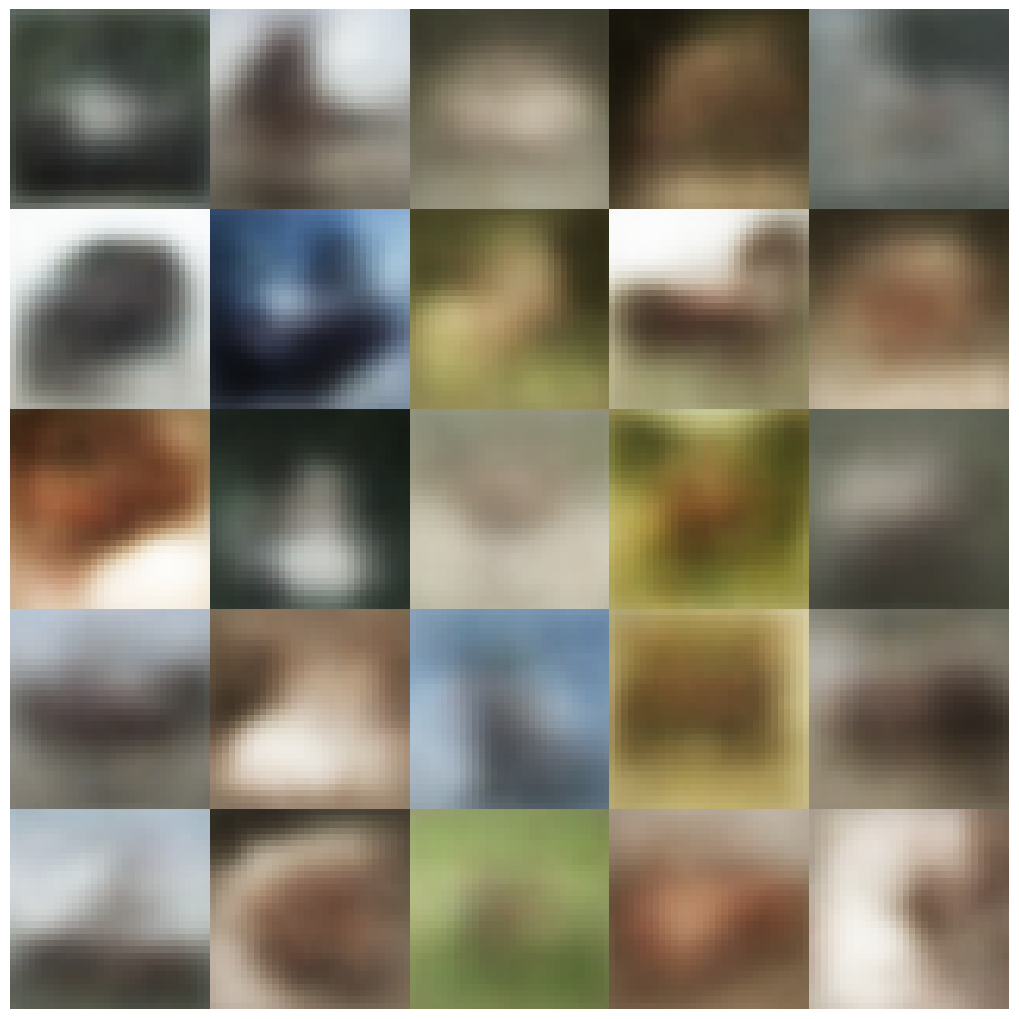

In [ ]:
# show results with normal sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        # Transpose the dimensions to (height, width, channels)
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0).permute(1, 2, 0))
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [ ]:
from pythae.samplers import GaussianMixtureSampler, GaussianMixtureSamplerConfig

**GMM sampling generation results**

In [ ]:
# set up GMM sampler config
gmm_sampler_config = GaussianMixtureSamplerConfig(
    n_components=10
)

# create gmm sampler
gmm_sampler = GaussianMixtureSampler(
    sampler_config=gmm_sampler_config,
    model=trained_model
)

# fit the sampler
gmm_sampler.fit(train_dataset)

In [ ]:
# sample
gen_data = gmm_sampler.sample(
    num_samples=25
)

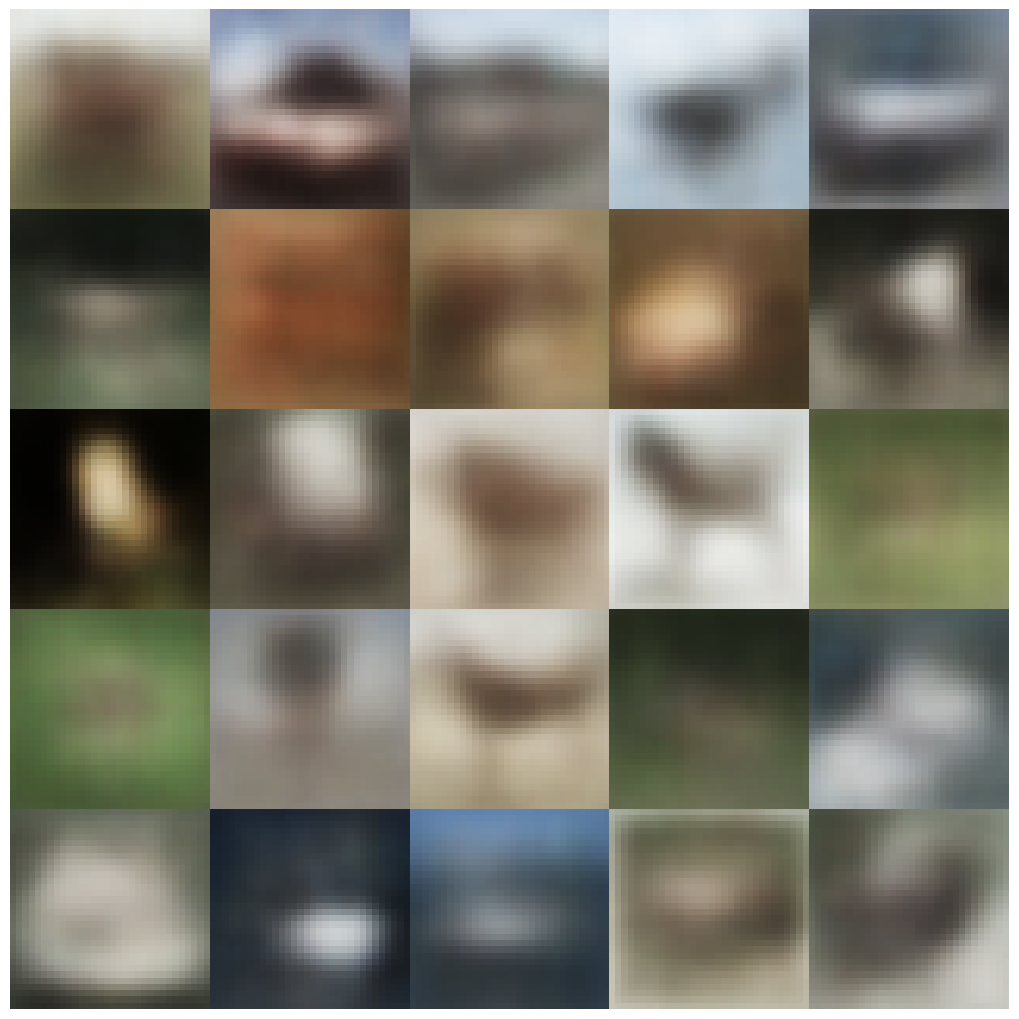

In [ ]:
# show results with gmm sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0).permute(1, 2, 0))
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

## ... the other samplers work the same

## Visualizing reconstructions

Here we are selecting data from the eval data and then passing it to the trained VAE architecture. After that, we compare the reconstruted data from the original data to see the quality of the reconstructed images

In [ ]:
reconstructions = trained_model.reconstruct(torch.from_numpy(eval_dataset[:25]).to(device).float()).detach().cpu()

Original eval data points/images

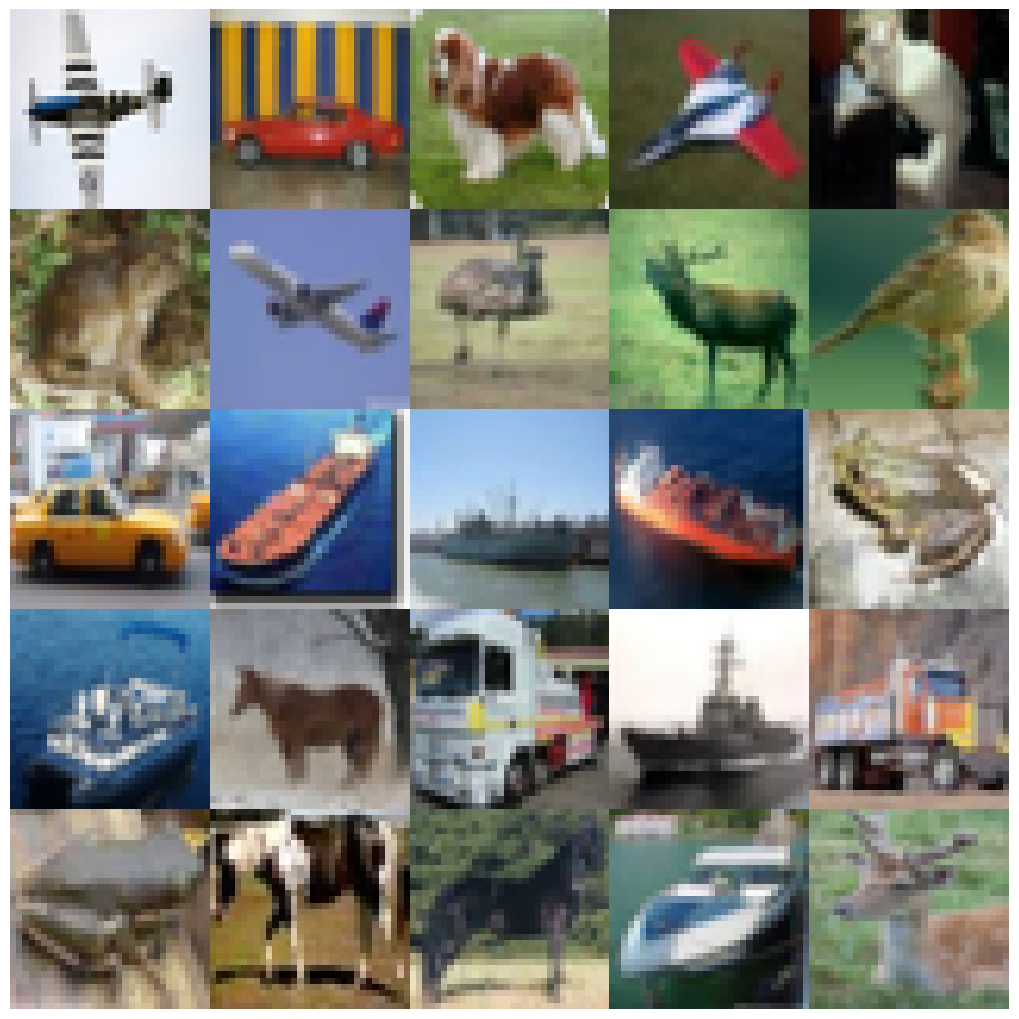

In [ ]:
# show original
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(eval_dataset[:25][i*5 + j].transpose(1, 2, 0))
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

Reconstructed images

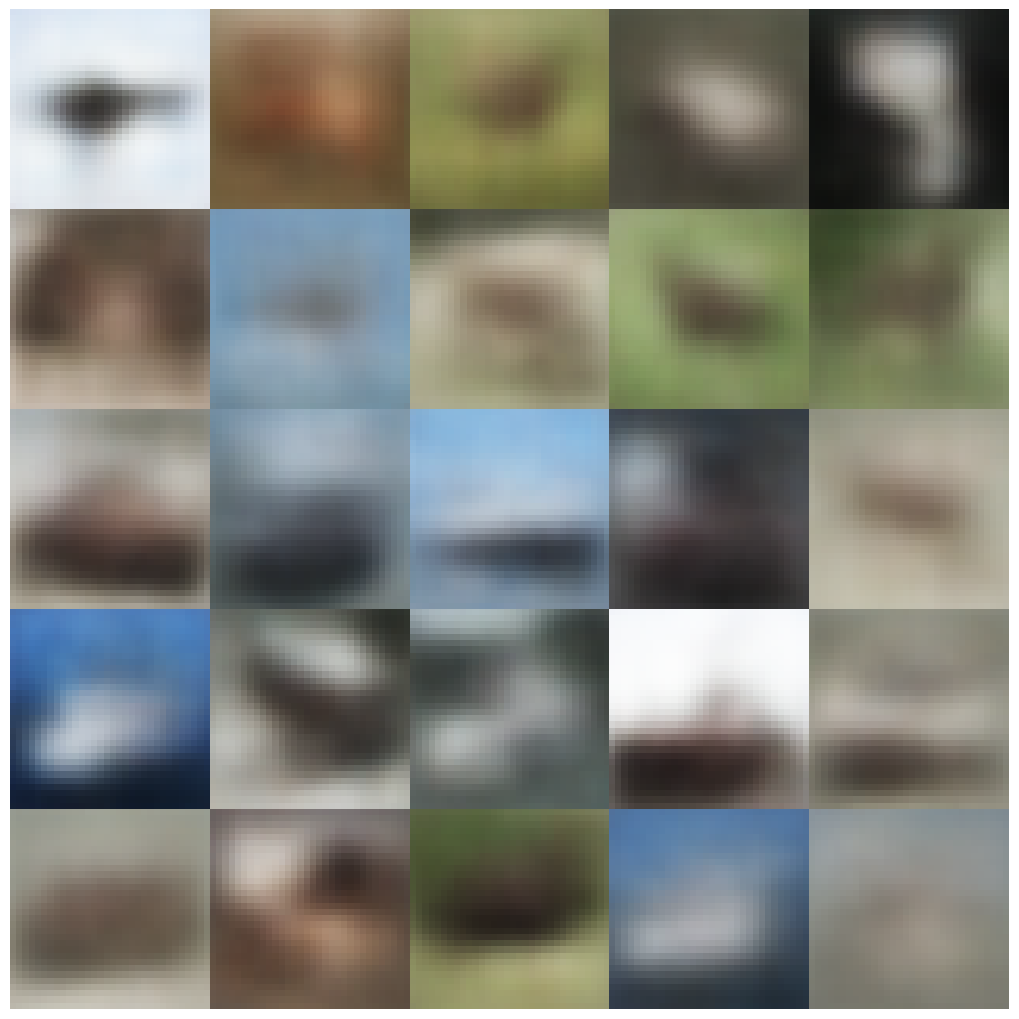

In [ ]:
# show reconstructions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(reconstructions[i*5 + j].cpu().squeeze(0).permute(1, 2, 0))
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [ ]:
# Install torchmetrics with image dependencies if not already installed
%pip install torchmetrics[image]

import torch
from torchmetrics.image.fid import FrechetInceptionDistance
from torchmetrics.image.inception import InceptionScore
import torchvision.transforms as T

# Define a function to calculate FID
def calculate_fid(real_images, generated_images, device, batch_size=64):
    fid = FrechetInceptionDistance(feature=2048).to(device)
    # Ensure images are in the correct format (uint8 and C, H, W)
    real_images = (real_images * 255).byte()
    generated_images = (generated_images * 255).byte()

    for i in range(0, real_images.size(0), batch_size):
        fid.update(real_images[i:i+batch_size].to(device), real=True)
    for i in range(0, generated_images.size(0), batch_size):
        fid.update(generated_images[i:i+batch_size].to(device), real=False)

    return fid.compute()

# Define a function to calculate Inception Score
def calculate_is(images, device, batch_size=64):
    is_score = InceptionScore().to(device)
    # Ensure images are in the correct format (uint8 and C, H, W)
    images = (images * 255).byte()

    for i in range(0, images.size(0), batch_size):
        is_score.update(images[i:i+batch_size].to(device))

    return is_score.compute()

# Generate a larger number of samples for evaluation (e.g., 1000)
num_eval_samples = 1000
gen_data_eval = normal_samper.sample(
    num_samples=num_eval_samples
).cpu()

# Use a subset of the real training data for evaluation
real_data_eval = torch.from_numpy(train_dataset[torch.randperm(len(train_dataset))[:num_eval_samples]]).cpu()


# Calculate FID score
fid_score = calculate_fid(real_data_eval, gen_data_eval, device)
print(f"FID score: {fid_score.item()}")

# Calculate Inception Score
# Note: Inception Score usually requires a larger number of samples (e.g., 10,000) for reliable results
# We will use 1000 samples here for demonstration purposes
is_mean, is_std = calculate_is(gen_data_eval, device)
print(f"Inception Score (mean): {is_mean.item()}, (std): {is_std.item()}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 26.3 MB/s eta 0:00:00


Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 365MB/s]


FID score: 253.4884490966797


/usr/local/lib/python3.12/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


Inception Score (mean): 2.0436832904815674, (std): 0.1305582970380783


### Inception Score (IS)

The Inception Score (IS) is a metric used to evaluate the quality of images generated by generative models, particularly Generative Adversarial Networks (GANs). It aims to measure two aspects of the generated images:

1.  **Image Quality (Intuitively):** This is measured by the *cleanness* or *sharpness* of individual generated images. The idea is that a high-quality image should be easily classifiable by a pre-trained image classification model (like the Inception network). If the classification model is confident about what's in the image, it's likely a well-formed image. This is captured by minimizing the conditional entropy $H(y|x) = - \sum_y P(y|x) \log P(y|x)$, where $y$ is the predicted class and $x$ is the generated image. A low conditional entropy (high confidence in prediction) for individual images contributes to a higher Inception Score.

2.  **Diversity:** This is measured by the variety of objects or scenes present across the set of generated images. A good generative model should produce diverse images, covering the full range of the target data distribution. This is captured by maximizing the marginal entropy $H(y) = - \sum_y P(y) \log P(y)$, where $P(y)$ is the marginal probability distribution of the predicted classes over the entire set of generated images. A high marginal entropy (predictions are spread across many classes) indicates high diversity, contributing to a higher Inception Score.

The Inception Score combines these two aspects. The formula for the Inception Score is:

$$
IS(G) = e^{\mathbb{E}_{x \sim p_g} [D_{KL}(p(y|x) || p(y))]}
$$

Where:
*   $G$ is the generative model.
*   $x \sim p_g$ means sampling an image $x$ from the distribution of images generated by the model $G$.
*   $p(y|x)$ is the conditional probability distribution over the classes $y$ given a generated image $x$, as predicted by a pre-trained classification model (usually an Inception network).
*   $p(y)$ is the marginal probability distribution over the classes $y$ across all generated images. This is calculated by averaging $p(y|x)$ over a large number of generated images: $p(y) = \mathbb{E}_{x \sim p_g} [p(y|x)]$.
*   $D_{KL}(p(y|x) || p(y))$ is the Kullback-Leibler (KL) divergence between the conditional distribution $p(y|x)$ and the marginal distribution $p(y)$. The KL divergence measures how much $p(y|x)$ deviates from $p(y)$.
*   $\mathbb{E}_{x \sim p_g} [\cdot]$ is the expectation over the generated images.

A higher Inception Score indicates better image quality (lower conditional entropy) and higher diversity (higher marginal entropy) in the generated samples.

### Report on Model Training and Evaluation

**Model Used:** VAE (Variational Autoencoder)

**Dataset:** CIFAR10

**Key Training Configuration:**
*   **Output Directory:** `my_model`
*   **Learning Rate:** 1e-4
*   **Per Device Train Batch Size:** 64
*   **Per Device Eval Batch Size:** 64
*   **Number of Epochs:** 100
*   **Optimizer:** AdamW
*   **Optimizer Parameters:** `weight_decay=0.05`, `betas=(0.91, 0.99)`

**Model Configuration:**
*   **Input Dimension:** (3, 32, 32) - corresponding to color CIFAR10 images
*   **Latent Dimension:** 16
*   **Encoder/Decoder Architectures:** ResNet-based architectures adapted for CIFAR.

**Training Process:**
The VAE model was trained for 10 epochs on the CIFAR10 training dataset. The training and evaluation losses were monitored during training.

**Evaluation Metrics and Results:**

*   **Sampler Used for Evaluation:** Normal Sampler (used to generate samples for FID and IS calculation)
*   **Number of Samples Used for Evaluation:** 1000 (for both FID and IS)
*   **Evaluation Device:** CUDA (GPU)

The following metrics were calculated using the `torchmetrics` library:

*   **Frechet Inception Distance (FID):** Measures the distance between the feature distributions of real and generated images. A *lower* FID score indicates better quality and diversity of generated images (closer to the real data distribution).
    *   **FID Score:** **253.4884**

*   **Inception Score (IS):** Measures the quality (cleanness) and diversity of generated images. A *higher* Inception Score indicates better quality and diversity.
    *   **Inception Score (mean):** **2.04368**
    *   **Inception Score (std):** **0.1305**

**Summary:**

The VAE model trained on CIFAR10 for 10 epochs achieved an FID score of approximately 309 and an Inception Score of approximately 1.84. These scores provide an initial quantitative assessment of the generated image quality and diversity. It's worth noting that these scores can be influenced by the number of training epochs, model architecture, hyperparameters, and the number of samples used for evaluation. Increasing the number of training epochs or further hyperparameter tuning could potentially lead to improved scores.